In [1]:
from fit_param import test
import matplotlib.pyplot as plt
import numpy as np
import os
from average_dTb import average_dTb, dTb_random_v_stream

In [5]:
# for m_chi in np.logspace(-2, 0, 3):
#     for V_rms in np.linspace(20000, 40000, 3):
#         param_fits = test([m_chi, V_rms], param_guess=[0.01, 29000], cores=1, repeat=20, plot=False, average_dir = 'average_dTb', delete_if_exists=False)

2 points; m,V=(0.1, 0.01), (29000, 20000.00)


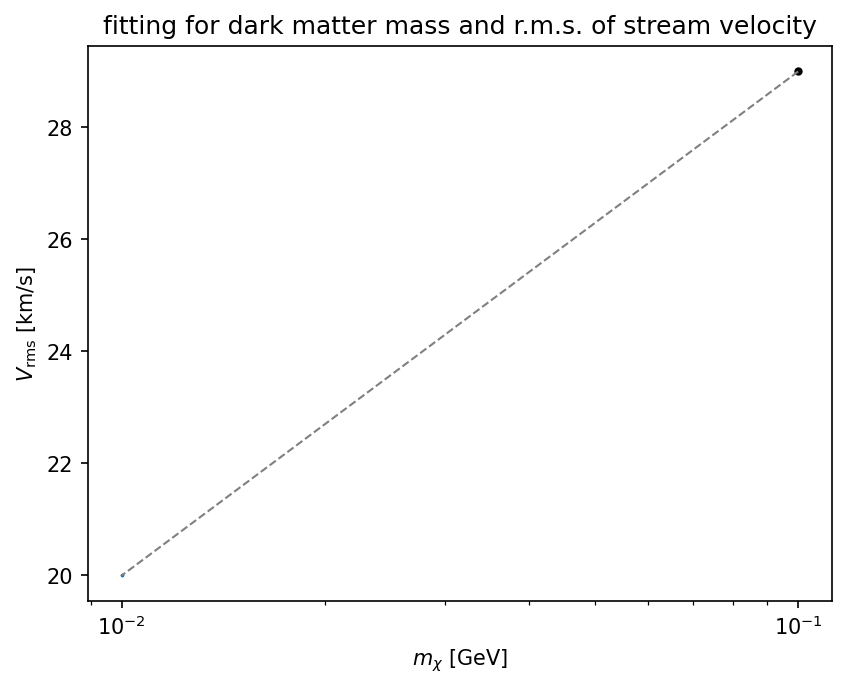

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import os

plt.figure(dpi=150)
N_point = 0
for filename in os.listdir("."):
    if filename[-4:] == ".npy":
        data = np.load(filename, mmap_mode='r')
        m_chi_averaged = np.average(data.T[0])
        V_rms_averaged = np.average(data.T[1])
        m_chi_real = float(filename.split('-')[0][5:])
        V_rms_real = float(filename.split('-')[1][5:-4])
        # plt.scatter(data.T[0], data.T[1]/1000, s=1, label=r"N={}, $m_\chi$={}GeV, $Vrms$={}km/s".format(data.shape[0], m_chi_real, int(V_rms_real/1000)))
        print(f"{data.shape[0]} points; "+f"m,V=({m_chi_real}, {m_chi_averaged}), "+f"({int(V_rms_real)}, {V_rms_averaged:.2f})")
        plt.scatter(data.T[0], data.T[1]/1000, s=0.5)
        plt.scatter(m_chi_real, V_rms_real/1000, marker=".", c='k')
        # plt.scatter(m_chi_averaged, V_rms_averaged/1000, marker="v", c='g')
        xerr = np.percentile(data.T[0], [15.9,84.1])
        yerr = np.percentile(data.T[1], [15.9,84.1])
        xerr = abs(xerr-m_chi_averaged)
        yerr = abs(yerr-V_rms_averaged)
        # xerr = np.std(data.T[0])
        # yerr = np.std(data.T[1])
        # print("xerr =", xerr, "yerr =", yerr)
        plt.errorbar(m_chi_averaged, V_rms_averaged/1000, xerr=np.array([xerr]).T, yerr=np.array([yerr]).T/1000, linewidth=1)
        plt.plot([m_chi_real, m_chi_averaged], [V_rms_real/1000, V_rms_averaged/1000], linewidth=1, linestyle='--', c='grey')
        N_point += 1
# plt.colorbar()
# plt.xlim(0, 0.15)
# plt.ylim(20,35)
plt.title("fitting for dark matter mass and r.m.s. of stream velocity")
plt.xlabel(r"$m_{\chi}$ [GeV]")
plt.xscale('log')
# plt.yscale('log')
plt.ylabel(r"$V_{\rm rms}$ [km/s]")
# plt.legend()
plt.savefig(f"initial_guess0.01-200Vrms-diff_step0.1.png")
plt.show()

In [5]:
def compare(m_list, v_list):
    plt.figure(dpi=150)
    for m_chi in m_list:
        for V_rms in v_list:
            z, dTb, m, V = average_dTb(m_chi=m_chi, V_rms=V_rms, more_random_v_streams=200, cores=1, verbose=False)
            # print('dTb =', dTb)
            plt.plot(z, dTb, label=f"{m} GeV, {V} m/s")
    # plt.xlim(0,300)
    # plt.ylim()
    plt.legend()
    plt.show()

1 CPU working...
It costs 0.19 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).
---------------------------------------------
1 CPU working...
It costs 0.19 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).
---------------------------------------------
1 CPU working...
It costs 0.19 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).
---------------------------------------------
1 CPU working...
It costs 0.22 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).
---------------------------------------------


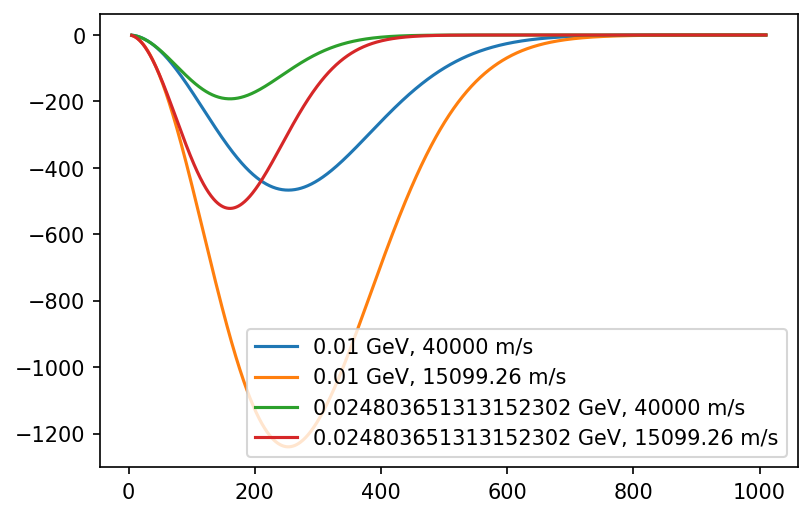

In [9]:
compare((0.01, 0.024803651313152302), (40000, 15099.26))

In [101]:
!pwd
!rm -r average_dTb*/
!rm m_chi*.npy
!rm ../slurm*.out

/home/xia/Bin/ares
rm: cannot remove 'm_chi*.npy': No such file or directory
rm: cannot remove '../slurm*.out': No such file or directory


In [3]:
def test(**kwargs):
    print(kwargs)

x = 1; y = 2
pf={'a':1, 'b':9}
test(x=x,z=y, **pf)

{'x': 1, 'z': 2, 'a': 1, 'b': 9}


In [4]:
def test(x=1,y=2):
    print(x,y)

test(x=1,y=2,**pf)

TypeError: test() got an unexpected keyword argument 'a'

In [35]:
import numpy as np
import matplotlib.pyplot as plt

V_rms = 29000
N = 2000

mean = np.zeros(3)
cov = np.eye(3, 3) * V_rms**2 / 3
initial_v_stream_list = np.random.multivariate_normal(mean, cov, N)
initial_v_stream_list = np.sqrt(np.sum(initial_v_stream_list**2, axis=1))


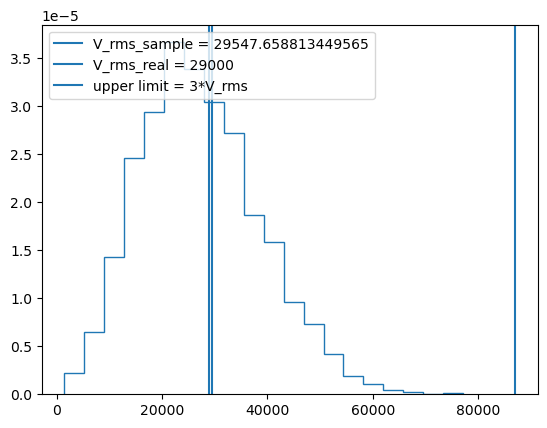

In [36]:
V_rms_sample = np.sqrt(np.average(initial_v_stream_list**2))

plt.axvline(x=V_rms_sample, ymin=0, ymax=1, label=f"V_rms_sample = {V_rms_sample}")
plt.axvline(x=V_rms, ymin=0, ymax=1, label=f"V_rms_real = {V_rms}")
plt.axvline(x=3*V_rms, ymin=0, ymax=1, label=f"upper limit = 3*V_rms")
plt.legend()
plt.hist(initial_v_stream_list, bins=20, density=True, histtype='step')
plt.show()

In [38]:
dTbs = np.arange(10).reshape(2,5)

In [39]:
dTbs

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [41]:
dTbs.shape

(2, 5)

In [44]:
pro = np.array([1,2])

In [45]:
dTbs.T@pro

array([10, 13, 16, 19, 22])